[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import imars3d
print(f"Using imarsd version {imars3d.__version__}")

from __code.imars3duitof import Imars3duiTOF
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

Using imarsd version 1.2.0


** Using Debugging Mode! **


# Select input data 

## raw data

In [2]:
o_imars3dui = Imars3duiTOF(working_dir=system.System.get_working_dir())
# o_imars3dui.select_raw()
o_imars3dui.current_data_type = 'raw'
o_imars3dui.data_selected("/SNS/VENUS/IPTS-33699/shared/processed_data/CT_Hematite_Magnetite_combined/")


raw folder selected: ['/SNS/VENUS/IPTS-33699/shared/processed_data/CT_Hematite_Magnetite_combined'] with 133 files)


## ob 

In [3]:
# o_imars3dui.select_ob()
o_imars3dui.current_data_type = 'ob'
o_imars3dui.data_selected(["/SNS/VENUS/IPTS-33699/shared/processed_data/CT_Hematite_Magnetite_OB_combined/"])

ob folder selected: ['/SNS/VENUS/IPTS-33699/shared/processed_data/CT_Hematite_Magnetite_OB_combined'] with 5 files)


# Load

In [4]:
o_imars3dui.load_and_display_data()

Before loading: total memory usage = 345.22MB


ct:   0%|          | 0/133 [00:00<?, ?it/s]

ob:   0%|          | 0/5 [00:00<?, ?it/s]

dc:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

After loading: total memory usage = 634.31MB


# Crop

In [5]:
%matplotlib inline

### select crop region

interactive(children=(IntSlider(value=0, description='left', max=511), IntSlider(value=510, continuous_update=…

<Figure size 640x480 with 0 Axes>

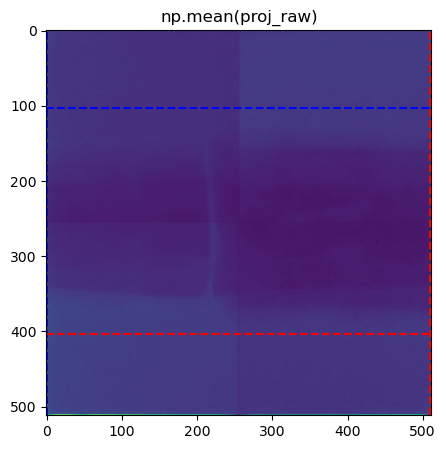

In [6]:
o_imars3dui.crop_embedded()

In [7]:
raw_data = o_imars3dui.proj_raw
ob = o_imars3dui.ob_raw

[left, right, top, bottom] = o_imars3dui.cropping.result

proj_crop = []
for _data in raw_data:
    proj_crop.append(_data[top: bottom, left: right])
o_imars3dui.proj_crop = np.asarray(proj_crop)
raw_data = None

ob_crop = []
for _data in ob:
    ob_crop.append(_data[top: bottom, left: right])
o_imars3dui.ob_crop = np.asarray(ob_crop)
ob = None

### perform cropping 

In [8]:
# o_imars3dui.perform_embedded_cropping()

# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!
Deleting proj_crop and releasing memory ...


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Before: total memory usage = 722.50MB
Running normalization ...


  0%|          | 0/2 [00:00<?, ?it/s]

normalization done in 0.05s
After: total memory usage = 800.89MB


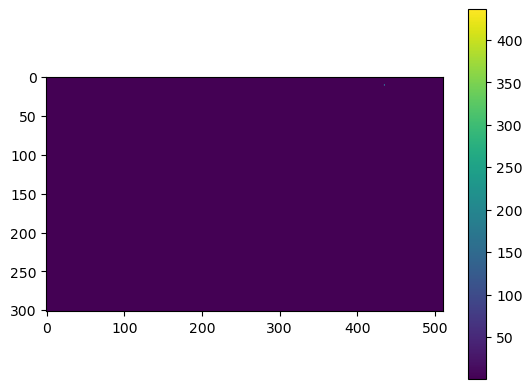

In [11]:
o_imars3dui.normalization_and_display()

# Rotation of sample by 90degrees

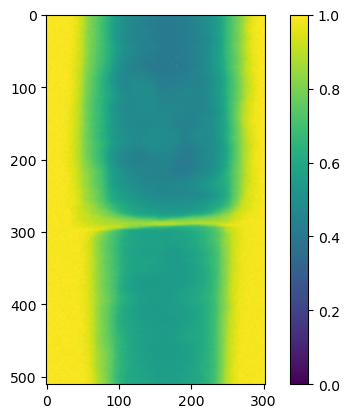

In [12]:
proj_norm = o_imars3dui.proj_norm
rotated_proj_norm = []
for _index, _norm in enumerate(proj_norm):
    rotated_proj_norm.append(np.rot90(_norm))

o_imars3dui.proj_norm_beam_fluctuation = np.asarray(rotated_proj_norm)

plt.figure(0)
plt.imshow(np.mean(rotated_proj_norm, axis=0), vmin=0, vmax=1)
plt.colorbar()

# Transmission to attenuation

Before transmission to attenuation: total memory usage = 878.99MB


  0%|          | 0/2 [00:00<?, ?it/s]

After transmission to attenuation: total memory usage = 900.81MB


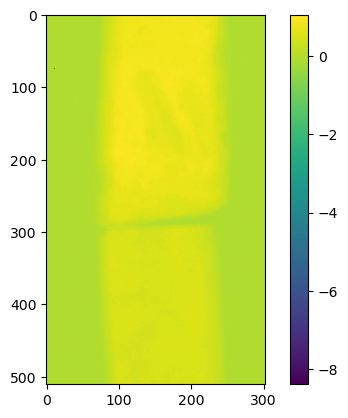

In [13]:
o_imars3dui.minus_log_and_display()

# Define list of rotation angles

In [14]:
list_of_angles_csv_file = "/SNS/VENUS/IPTS-33699/shared/processed_data/list_angles_CT_Hematite_Magnetite_combined.csv"
assert os.path.exists(list_of_angles_csv_file)

list_angles_object = pd.read_csv(list_of_angles_csv_file, names=["index", "angle"])
list_angles = np.asarray(list_angles_object['angle'])[1:]

rot_angles_sorted = list_angles
rot_angles_sorted.sort()
o_imars3dui.mean_delta_angle = np.mean([y - x for (x, y) in zip(rot_angles_sorted[:-1],
                                                                 rot_angles_sorted[1:])])

o_imars3dui.rot_angles = list_angles
print(list_angles)
print(len(list_angles))

[  0.    1.4   2.8   4.2   5.6   7.    8.4   9.8  11.2  12.6  14.   15.4
  16.8  18.2  19.6  21.   22.4  23.8  25.2  26.6  28.   29.4  30.8  32.2
  33.6  35.   36.4  37.8  39.2  40.6  42.   43.4  44.8  46.2  47.6  49.
  50.4  51.8  53.2  54.6  56.   57.4  58.8  60.2  61.6  63.   64.4  65.8
  67.2  68.6  70.   71.4  72.8  74.2  75.6  77.   78.4  79.8  81.2  82.6
  84.   85.4  86.8  88.2  89.6  91.   92.4  93.8  95.2  96.6  98.   99.4
 100.8 102.2 103.6 105.  106.4 107.8 109.2 110.6 112.  113.4 114.8 116.2
 117.6 119.  120.4 121.8 123.2 124.6 126.  127.4 128.8 130.2 131.6 133.
 134.4 135.8 137.2 138.6 140.  141.4 142.8 144.2 145.6 147.  148.4 149.8
 151.2 152.6 154.  155.4 156.8 158.2 159.6 161.  162.4 163.8 165.2 166.6
 168.  169.4 170.8 172.2 173.6 175.  176.4 177.8 179.2 180.6 182.  183.4
 184.8]
133


# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [15]:
# o_imars3dui.find_0_180_degrees_files()

o_imars3dui.index_0_degree = 0
o_imars3dui.index_180_degree = 130

## calculate tilt 

In [16]:
o_imars3dui.calculate_tilt(0, 130)

In [17]:
from imars3d.backend.diagnostics import tilt as diagnostics_tilt

In [18]:
proj_tilted = diagnostics_tilt.apply_tilt_correction(arrays=o_imars3dui.proj_mlog, 
                                                     tilt=0.140)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = 0.140 deg


Applying tilt corr:   0%|          | 0/133 [00:00<?, ?it/s]

# find rotation center

In [19]:
from imars3d.backend.diagnostics.rotation import find_rotation_center

In [ ]:
from tomopy.recon.rotation import find_center_pc

rot_center = find_center_pc(proj_tilted[o_imars3dui.index_0_degree], 
                            proj_tilted[o_imars3dui.index_180_degree])

In [21]:
rot_center = find_rotation_center(arrays=proj_tilted,
                                  angles=o_imars3dui.rot_angles,
                                  num_pairs=1,
                                  in_degrees=True,
                                  atol_deg=o_imars3dui.mean_delta_angle)

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 6
INFO:imars3d.backend.diagnostics.rotation:Using one pair of angles


Finding rotation center:   0%|          | 0/1 [00:00<?, ?it/s]

# Display sinogram 

In [30]:
o_imars3dui.create_and_display_sinogram()

AttributeError: 'Imars3duiTOF' object has no attribute 'proj_tilt_corrected'

# Ring removal

### select 

In [ ]:
o_imars3dui.ring_removal_options()

### apply 

In [ ]:
o_imars3dui.apply_ring_removal_options()

### check 

In [ ]:
o_imars3dui.test_ring_removal()

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [ ]:
o_imars3dui.rotation_center()

# Reconstruction 

In [ ]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()